In [138]:
# import libraries
# python staples
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
# scikitlearn
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
# use matplot in jupyter notebook
%matplotlib inline

In [ ]:
def confusion_summary_binary(y_actual, y_pred):
    # get success and failur
    tot_tested = len(y_actual)
    tot_success = sum( y_actual )
    tot_fail = tot_tested - tot_success
    pred_success = sum( y_pred )
    pred_fail = tot_tested - pred_success
    # see how you did
    confusion_mat = confusion_matrix(y_actual, y_pred)
    confusion_mat_norm = confusion_mat / tot_tested
    accuracy = confusion_mat_norm[0,0] + confusion_mat_norm[1,1]
    recall = confusion_mat[0,0] / tot_success
    precision = confusion_mat[0,1] / pred_success
    f1 = 2 / ( 1/recall + 1/precision)
    print('accuracy = ', accuracy )
    print('recall = ', recall )
    print('precision = ', precision )
    print('f1 =', f1  )
    summary = {"confusion": confusion_mat, "confusion_norm": confusion_mat_norm,
               "recall": recall, "precision": precision, "f1": f1,
               "accuracy": accuracy}
    return summary

In [139]:
# grab the data and put it in a pandas dataframe
df_train_all = pd.read_csv('train.csv')
df_test_all = pd.read_csv('train.csv')
# print some info
print( 'example:\n', df_train_all.iloc[0])
# some data is pointless, get rid of id
df_train = df_train_all.drop(
    ['PassengerId','Name','Ticket', 'Cabin'], axis=1 )
df_test = df_test_all.drop(
    ['PassengerId','Name','Ticket', 'Cabin'], axis=1 )
# grab the y data
y_test = df_test.Survived
y_train = df_test.Survived

example:
 PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


In [140]:
# clean it
# find isnan value
print( 'isnan check:', df_x_train.isna().any() )
# build a list to clean both train and test
list2clean = [ df_test, df_train]
for dataind, mydata in enumerate(list2clean):
    #print(mydata)
    # turn male/female, embarked to a number
    mydata.loc[mydata.Sex == 'female','Sex' ] = 0
    #mydata[mydata.Sex == 'female']['Sex']= 0
    mydata.loc[mydata.Sex == 'male','Sex' ] = 1
    mydata.loc[mydata.Embarked == 'S','Embarked' ] = 0
    mydata.loc[mydata.Embarked == 'C','Embarked' ] = 1
    mydata.loc[mydata.Embarked == 'Q','Embarked' ] = 2
    # replace nan with average
    mydata.loc[mydata.Age.isnull(),'Age']  = np.mean( mydata.Age[~mydata.Age.isna()] )
    mydata.loc[mydata.Embarked.isna(),'Embarked'] = mydata.mode().Embarked[0]
    #normalize
    list2clean[dataind] = ( mydata - mydata.mean() ) / mydata.std()
df_test = list2clean[0]
df_train = list2clean[1]

isnan check: Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool


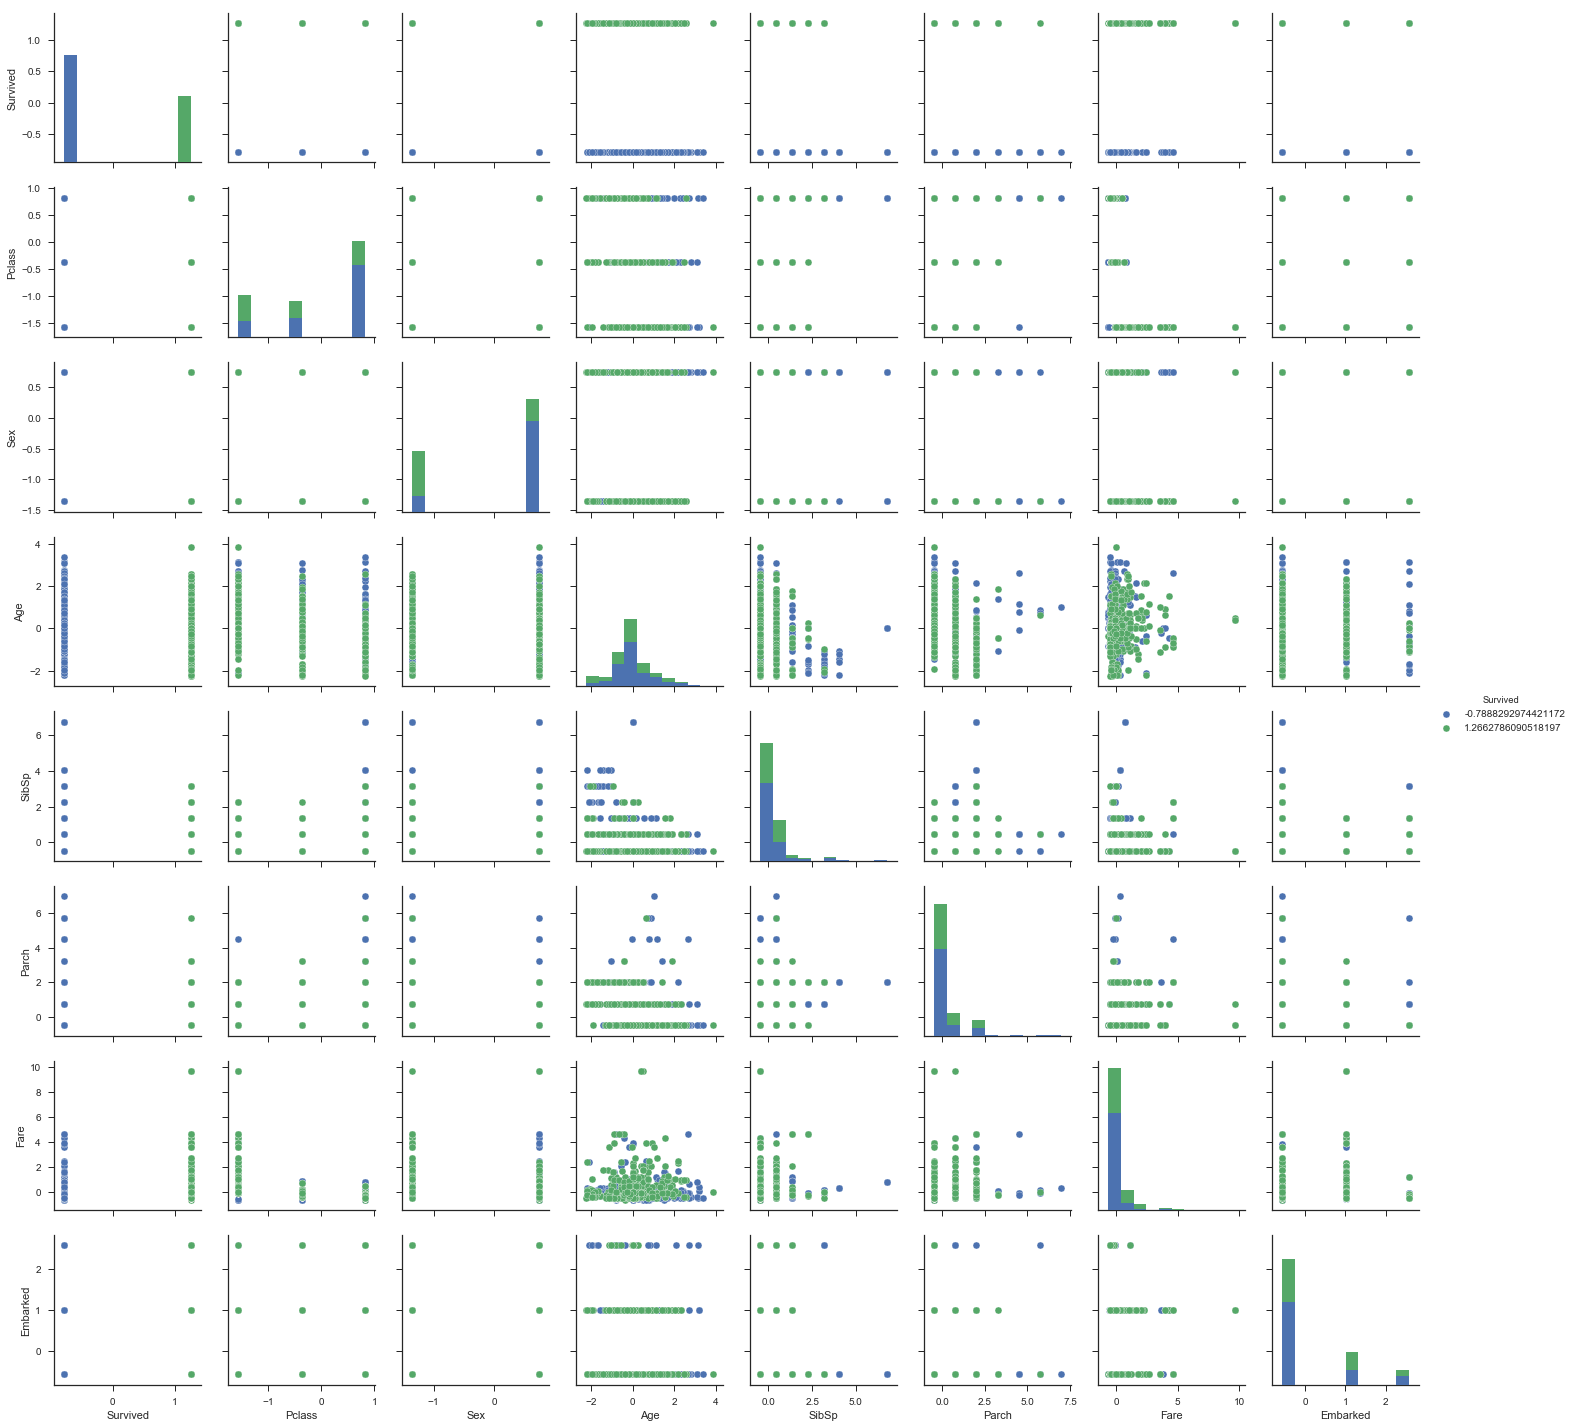

In [70]:
sns.set(style="ticks")
sns.pairplot(df_x_train, hue='Survived')

In [106]:
# Drop the y data from the dataframe for analysis
x_test = df_test.drop('Survived',axis=1)
x_train = df_test.drop('Survived',axis=1)

In [178]:
# analyze logistic
logistic = linear_model.LogisticRegression
logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)
print(logistic.coef_)
log_pred = logistic.predict(x_test)
log_correct = np.sum(log_pred == y_test) / np.size( y_test )
# f1, recall, precision test
log_sum = confusion_summary_binary( y_test, log_pred)


[[-0.92075739 -1.28280884 -0.50937219 -0.35649082 -0.07102207  0.11437467
   0.16217468]]
accuracy =  0.8002244668911336
recall =  1.3801169590643274
precision =  0.24213836477987422
f1 = 0.4119934251544522


In [180]:
# Logistical fit using sm.Logit
logit = sm.Logit(y_train, x_train)
# fit the model
result = logit.fit()
result.summary2()
print(result.params)
result.predict(y_test)
#print(y_test)

Optimization terminated successfully.
         Current function value: 0.470583
         Iterations 7
Pclass     -0.834911
Sex        -1.316860
Age        -0.498316
SibSp      -0.349224
Parch      -0.121288
Fare        0.256296
Embarked    0.146786
dtype: float64


ValueError: shapes (1,891) and (7,) not aligned: 891 (dim 1) != 7 (dim 0)